# Ansatz comparison

On simulator, L_BFGS_B optimizer, $H_2$ molecule, Jordan-Wigner mapping.

- UCCSD (4-qubits)
- From paper (2-qubits) https://pmc.ncbi.nlm.nih.gov/articles/PMC9979602/
- UCC
- (ADAPT-VQE)
- (OO-UCC)

In [19]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
import numpy as np
from qiskit.primitives import StatevectorEstimator
from matplotlib import pyplot as plt

driver = PySCFDriver(
    atom='H .0 .0 .0; H .0 .0 0.735',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',
)
problem = driver.run()

print("MOLECULAR STRUCTURE:")
print("orbitals: ", problem.num_spatial_orbitals)
print("particles: ", problem.num_particles)

from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()

qubit_hamiltonian = mapper.map(problem.hamiltonian.second_q_op())
print("\nQUBIT HAMILTONIAN:")
print(qubit_hamiltonian)

optimizer = L_BFGS_B()


MOLECULAR STRUCTURE:
orbitals:  2
particles:  (1, 1)

QUBIT HAMILTONIAN:
SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.17218393+0.j,
 -0.22575349+0.j,  0.12091263+0.j,  0.16892754+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])



UCCSD:


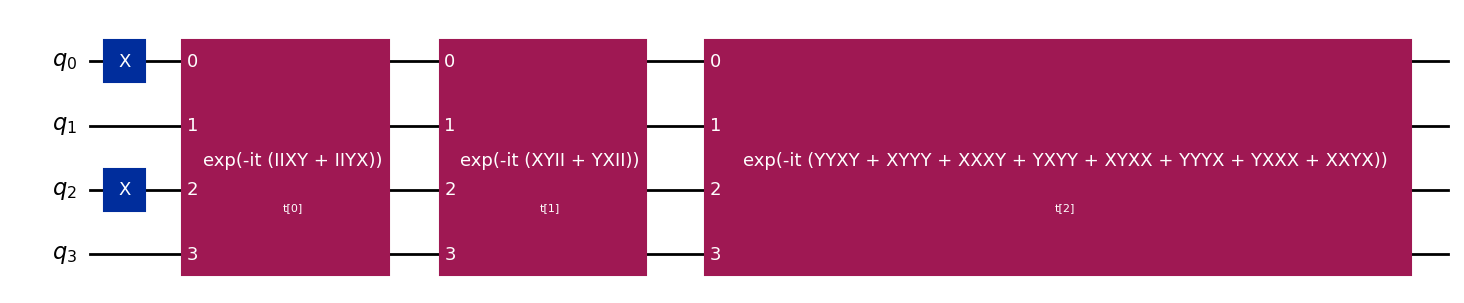

In [16]:
from qiskit.visualization import circuit_drawer

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

print("\nUCCSD:")
circuit_drawer(ansatz.decompose(), output='mpl')



RESULTS:
Optimal Parameters: [ 2.41621492e-08 -6.36053279e-08 -1.11768404e-01]
Optimal Energy: -1.8572750302023462


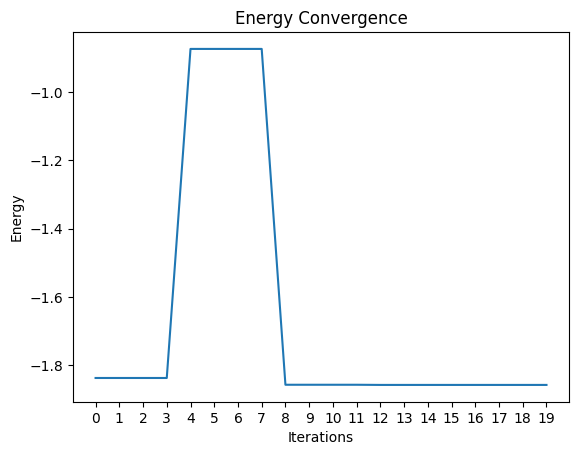

In [17]:
initial_point = np.zeros(ansatz.num_parameters)
estimator = StatevectorEstimator()
results1 = []

def estimate_energy(parameters):
    job = estimator.run(
        [(ansatz, qubit_hamiltonian, parameters)]
    )
    result = job.result()[0].data.evs
    results1.append(result)
    return result

result1 = optimizer.minimize(fun=estimate_energy, x0=initial_point)

print("\nRESULTS:")
print("Optimal Parameters:", result1.x)
print("Optimal Energy:", result1.fun)

plt.plot(results1)
plt.xlabel('Iterations')
plt.xticks(range(len(results1)))
plt.ylabel('Energy')
plt.title('Energy Convergence')
plt.show()

In [ ]:
from qiskit.visualization import circuit_drawer
from qiskit_nature.second_q.circuit.library import UCC

ansatz = UCC(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

print("\nUCC:")
circuit_drawer(ansatz.decompose(), output='mpl')


UCC:


ValueError: The qubit_mapper cannot be `None`.